In [4]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import os
import pickle
import utils

from jax import vmap,grad

In [5]:

equation_dict = {
    'poisson_1d-sin_cos':'u = sin(6x)cos(100x)',
    'poisson_1d-x2_add_sinx': 'u = sin(500x)-2*(x-0.5)^2',
    'poisson_1d-mix_sin':'u= sin(x) + 0.1*sin(20x) + 0.05*cos(100x)',
    'poisson_1d-x_time_sinx': 'u = x*sin(200x)',
    }


def load_and_predict(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    model, preds, Xtr = utils.get_model_1d(params, trick_paras)

    return model, preds, Xtr, log_dict

def load_and_predict_extra(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, params_extra, log_dict, trick_paras = pickle.load(f)

    model, preds, Xtr = utils.get_model_1d_extra(params, params_extra, trick_paras)

    return model, preds, Xtr, log_dict


def draw_fig(model, preds, Xtr, log_dict):

    err = min(log_dict['err_list'])
    equation_name =model.trick_paras['equation']
    kernel_name = model.cov_func.__class__.__name__

    # generate new figure
    plt.figure(figsize=(8, 6))

    plt.plot(model.Xte.flatten(), model.yte.flatten(), 'k-', label='Truth')
    plt.plot(model.Xte.flatten(), preds.flatten(), 'r-', label='Pred')
    plt.scatter(Xtr.flatten(), model.y.flatten(), c='g', label='Train')
    plt.legend(loc=2)

    # print eq name, kernel_name and err as title
    plt.title('Equation: {}, \n Kernel: {},   L2 Err: {:.2e}'.format(equation_dict[equation_name], kernel_name, err))

    # to save figure
    prefix = '../figs/' + equation_name + '/' + 'Q-%d'%(model.trick_paras['Q']) + '/'

    # create folder if not exist
    if not os.path.exists(prefix):
        os.makedirs(prefix)

    # save as pdf and png
    plt.savefig(prefix + kernel_name + '.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(prefix +kernel_name+ '.png', dpi=300, bbox_inches='tight')

: 

equation is:  poisson_1d-x_time_sinx
kernel is: Matern52_Cos_1d


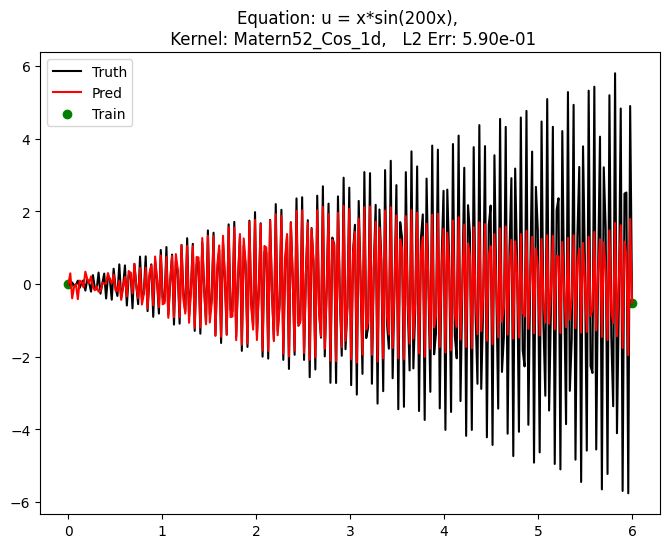

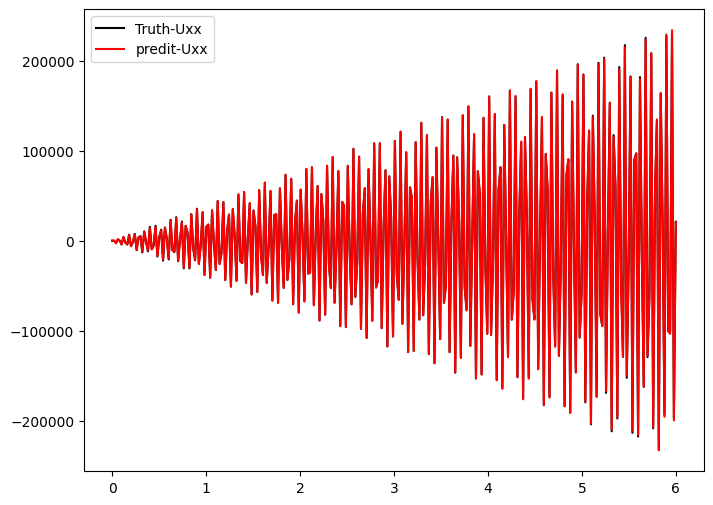

In [3]:
kernel_name = 'Matern52_Cos_1d'
save_name ='llk_weight-1000.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=50-logdet-1-x-2pi-Ncol-300'

prefix = '../result_log/poisson_1d-x_time_sinx/kernel_%s/epoch_100000/Q30/'%(kernel_name)
with open(prefix + save_name + '.pkl', 'rb') as f:
    params, log_dict, trick_paras = pickle.load(f)

model, preds, Xtr = utils.get_model_1d(params, trick_paras)

draw_fig(model, preds, Xtr, log_dict)

u = params['u']  # function values at the collocation points
log_tau = params['log_tau']
log_v = params['log_v']

K, Kinv_u, u_xx = model.value_and_grad_kernel(params, 1)

plt.figure(figsize=(8, 6))

plt.plot(model.X_col.flatten(), model.src_col.flatten(), 'k-',  label='Truth-Uxx')

plt.plot(model.X_col.flatten(), u_xx.flatten(), 'r-', label='predit-Uxx')

plt.legend(loc=2)

equation is:  poisson_1d-x_time_sinx
kernel is: Matern52_Cos_1d


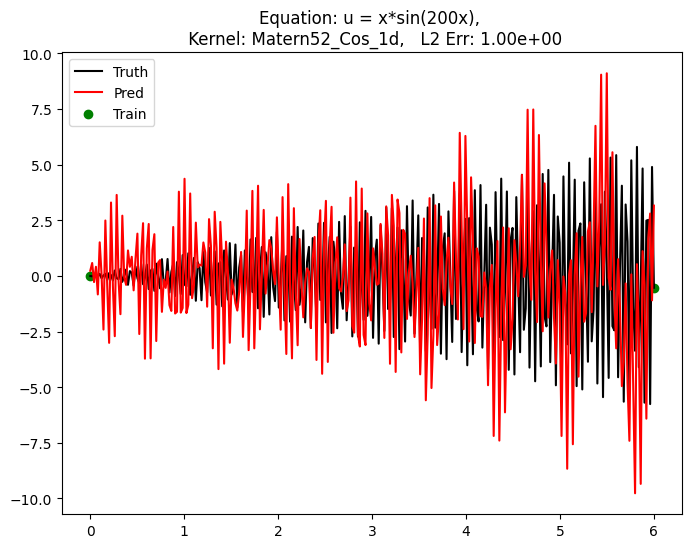

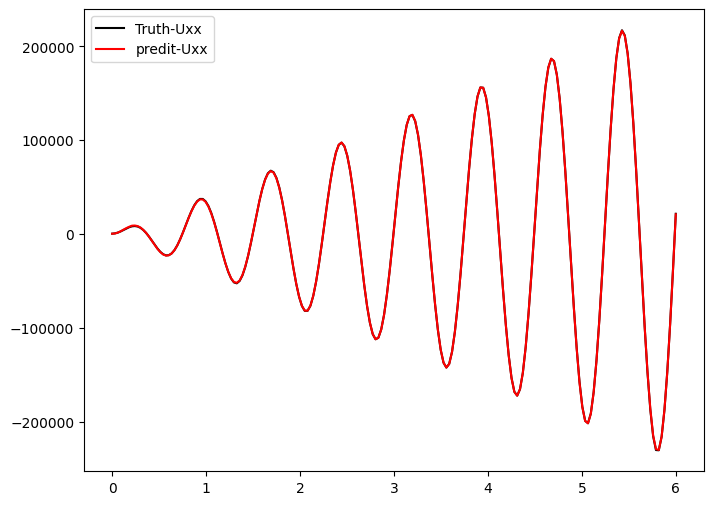

In [3]:
kernel_name = 'Matern52_Cos_1d'
save_name ='llk_weight-1000.0-nu-1-Q-30-epoch-30000-lr-0.0100-freqscale=50-logdet-1-x-2pi-Ncol-200'

prefix = '../result_log/poisson_1d-x_time_sinx/kernel_%s/epoch_30000/Q30/'%(kernel_name)
with open(prefix + save_name + '.pkl', 'rb') as f:
    params, log_dict, trick_paras = pickle.load(f)

model, preds, Xtr = utils.get_model_1d(params, trick_paras)

draw_fig(model, preds, Xtr, log_dict)

u = params['u']  # function values at the collocation points
log_tau = params['log_tau']
log_v = params['log_v']

K, Kinv_u, u_xx = model.value_and_grad_kernel(params, 1)

plt.figure(figsize=(8, 6))

plt.plot(model.X_col.flatten(), model.src_col.flatten(), 'k-',  label='Truth-Uxx')

plt.plot(model.X_col.flatten(), u_xx.flatten(), 'r-', label='predit-Uxx')

plt.legend(loc=2)

equation is:  poisson_1d-x_time_sinx
kernel is: Matern52_Cos_1d


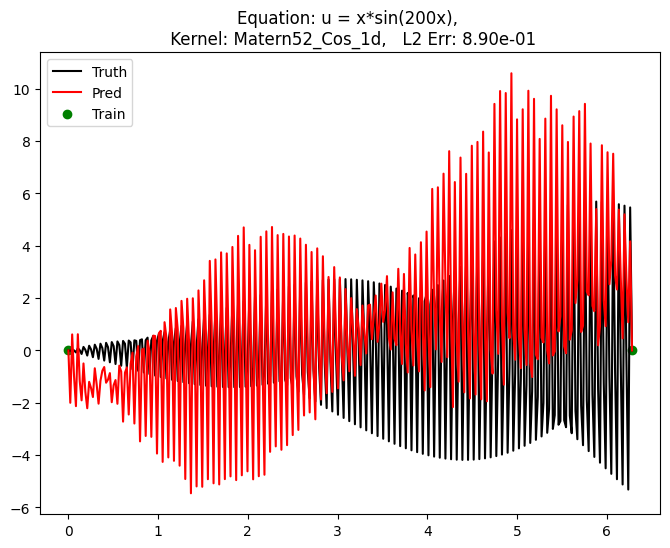

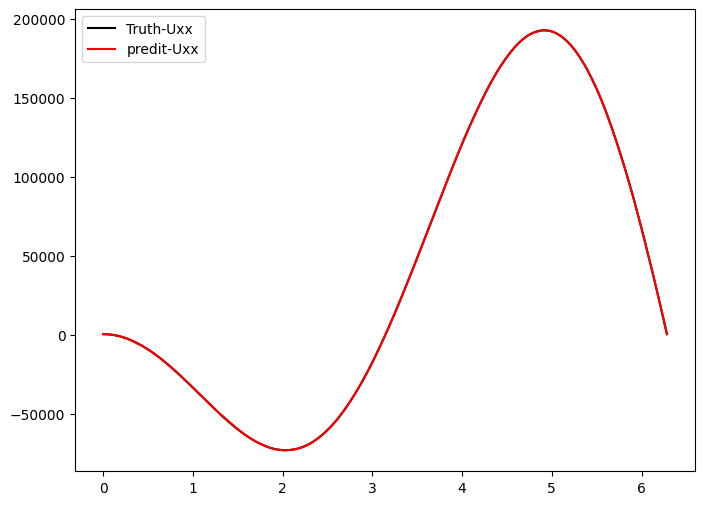

: 

In [5]:
kernel_name = 'Matern52_Cos_1d'
save_name ='llk_weight-1000.0-nu-1-Q-30-epoch-100000-lr-0.0010-freqscale=50-logdet-1-x-2pi'

prefix = '../result_log/poisson_1d-x_time_sinx/kernel_%s/epoch_100000/Q30/'%(kernel_name)
with open(prefix + save_name + '.pkl', 'rb') as f:
    params, log_dict, trick_paras = pickle.load(f)

model, preds, Xtr = utils.get_model_1d(params, trick_paras)

draw_fig(model, preds, Xtr, log_dict)

u = params['u']  # function values at the collocation points
log_tau = params['log_tau']
log_v = params['log_v']

K, Kinv_u, u_xx = model.value_and_grad_kernel(params, 1)

plt.figure(figsize=(8, 6))

plt.plot(model.X_col.flatten(), model.src_col.flatten(), 'k-',  label='Truth-Uxx')

plt.plot(model.X_col.flatten(), u_xx.flatten(), 'r-', label='predit-Uxx')

plt.legend(loc=2)

equation is:  poisson_1d-mix_sin
kernel is: Matern52_Cos_1d


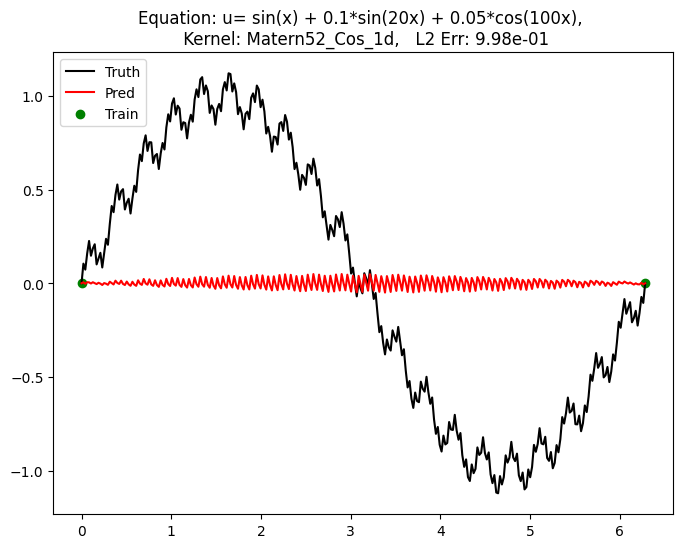

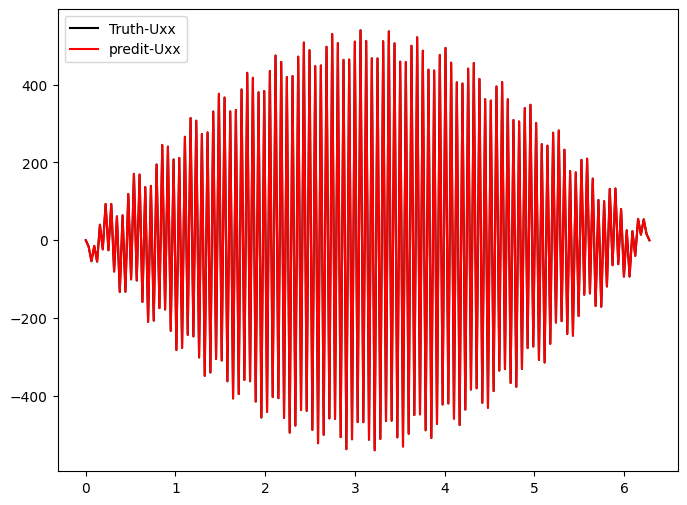

In [10]:
kernel_name = 'Matern52_Cos_1d'
save_name = 'llk_weight-1000.0-nu-1-Q-30-epoch-100000-lr-0.0010-freqscale=30-logdet-1-x-2pi'

prefix = '../result_log/poisson_1d-mix_sin/kernel_%s/epoch_100000/Q30/'%(kernel_name)
with open(prefix + save_name + '.pkl', 'rb') as f:
    params, log_dict, trick_paras = pickle.load(f)

model, preds, Xtr = utils.get_model_1d(params, trick_paras)    
draw_fig(model, preds, Xtr, log_dict)


u = params['u']  # function values at the collocation points
log_tau = params['log_tau']
log_v = params['log_v']

K, Kinv_u, u_xx = model.value_and_grad_kernel(params, 1)

plt.figure(figsize=(8, 6))

plt.plot(model.X_col.flatten(), model.src_col.flatten(), 'k-',  label='Truth-Uxx')

plt.plot(model.X_col.flatten(), u_xx.flatten(), 'r-', label='predit-Uxx')

plt.legend(loc=2)

In [3]:
kernel_name = 'Matern52_Cos_1d'
save_name = 'llk_weight-1000.0-nu-1-Q-30-epoch-100000-lr-0.0010-freqscale=30-logdet-1-x-2pi'

prefix = '../result_log/poisson_1d-mix_sin/kernel_%s/epoch_100000/Q30/'%(kernel_name)
with open(prefix + save_name + '.pkl', 'rb') as f:
    params, log_dict, trick_paras = pickle.load(f)

model, preds, Xtr = utils.get_model_1d(params, trick_paras)    
draw_fig(model, preds, Xtr, log_dict)


u = params['u']  # function values at the collocation points
log_tau = params['log_tau']
log_v = params['log_v']

K, Kinv_u, u_xx = model.value_and_grad_kernel(params, 1)

plt.figure(figsize=(8, 6))

plt.plot(model.X_col.flatten(), model.src_col.flatten(), 'k-',  label='Truth-Uxx')

plt.plot(model.X_col.flatten(), u_xx.flatten(), 'r-', label='predit-Uxx')

plt.legend(loc=2)

KeyError: 'x_scale'

equation is:  poisson_1d-x_time_sinx
kernel is: Matern52_Cos_1d
equation is:  poisson_1d-x_time_sinx
kernel is: Matern52_1d
equation is:  poisson_1d-x_time_sinx
kernel is: SE_1d
equation is:  poisson_1d-x_time_sinx
kernel is: SE_Cos_1d


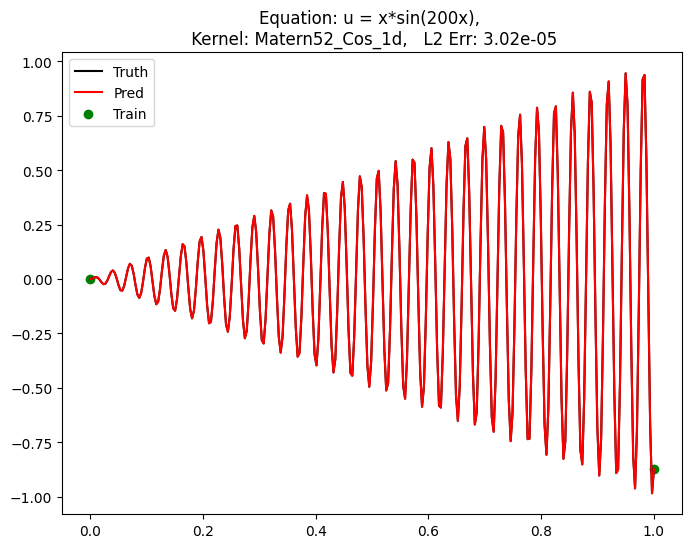

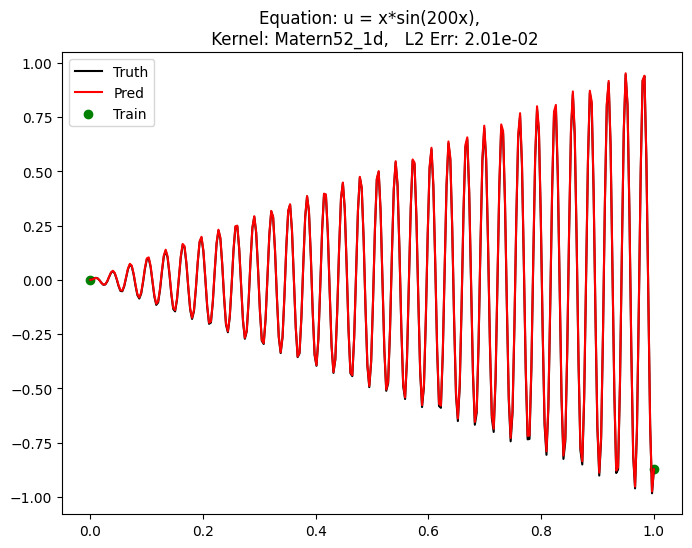

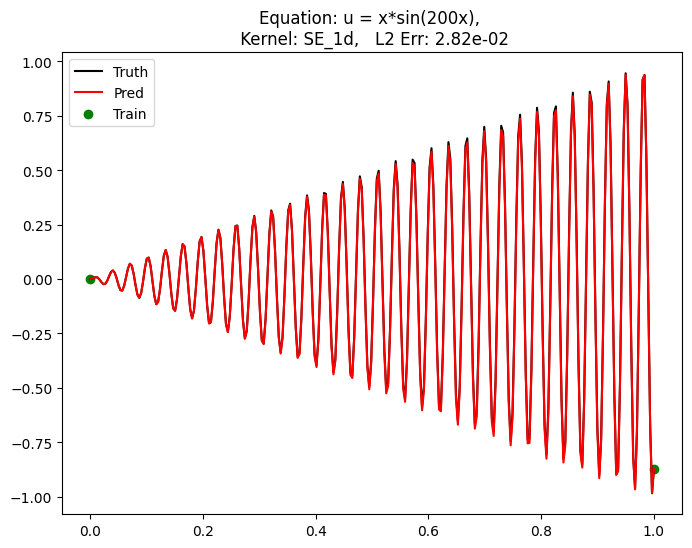

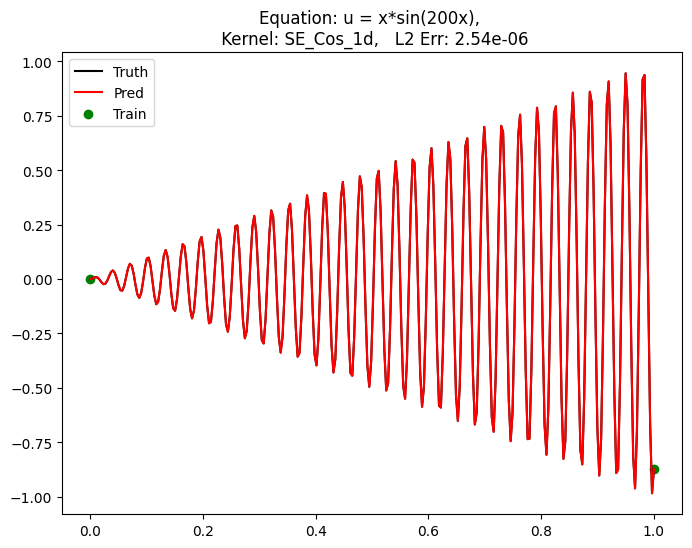

In [8]:
# for poisson_1d_x_time_sinx

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_1d-x_time_sinx/kernel_%s/epoch_1000000/Q30/'%(kernel_name)

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)
    draw_fig(model, preds, Xtr, log_dict)

equation is:  poisson_1d-sin_cos
kernel is: Matern52_Cos_1d
equation is:  poisson_1d-sin_cos
kernel is: Matern52_1d
equation is:  poisson_1d-sin_cos
kernel is: SE_1d
equation is:  poisson_1d-sin_cos
kernel is: SE_Cos_1d


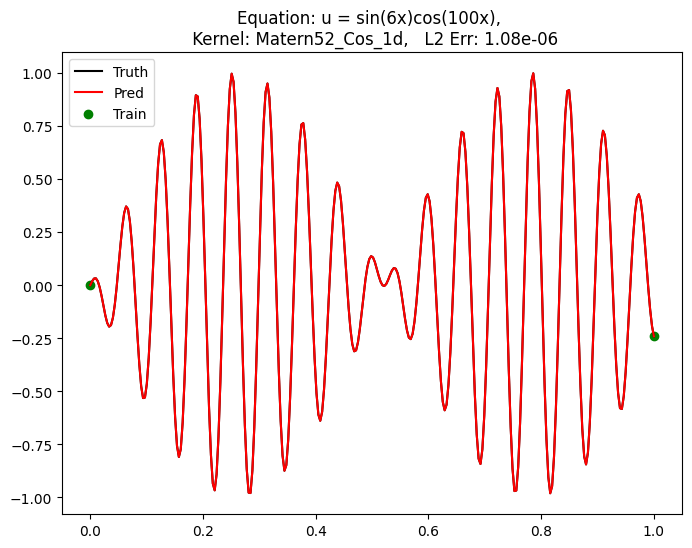

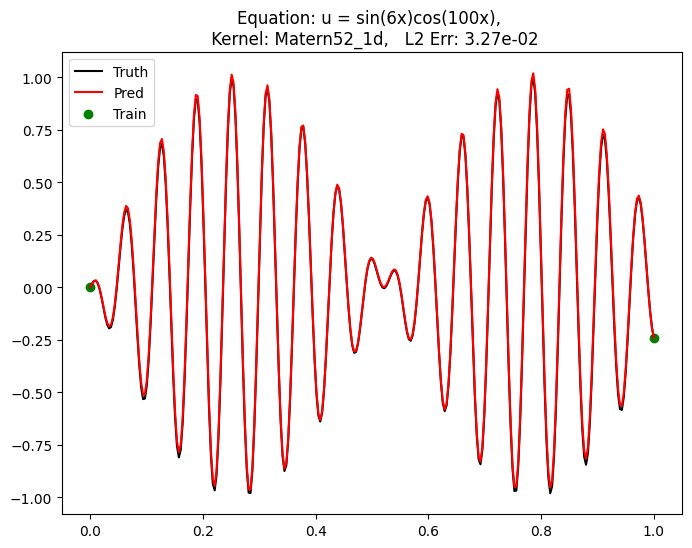

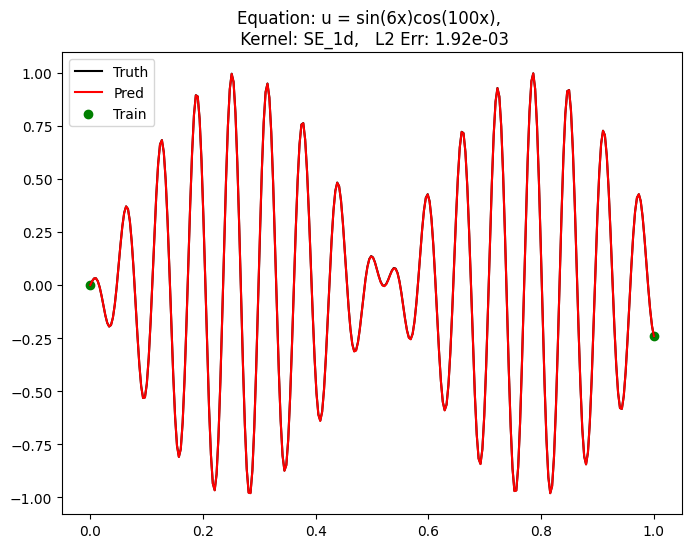

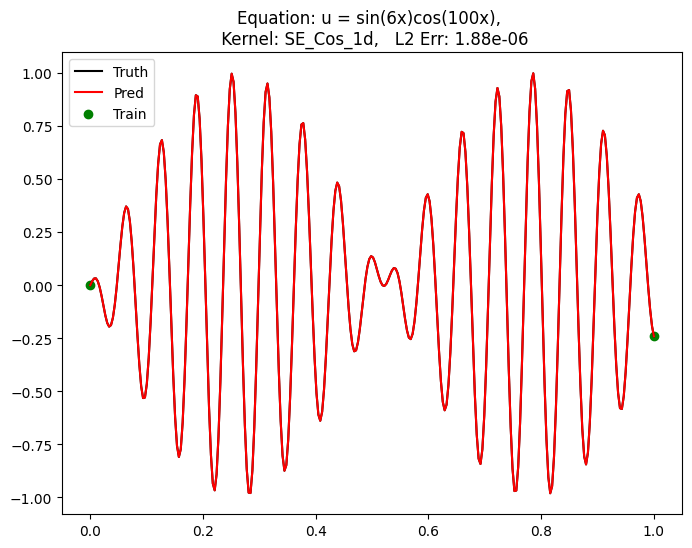

In [19]:
# for poisson_1d_sin_cos

kernel_list = ['Matern52_Cos_1d','Matern52_1d','SE_1d','SE_Cos_1d']

# prefix = '../result_log/poisson_1d-sin_cos/kernel_Matern52_Cos_1d/epoch_1000000/Q30/'
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1'

for kernel_name in kernel_list:
    prefix = '../result_log/poisson_1d-sin_cos/kernel_%s/epoch_1000000/Q30/'%(kernel_name)

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)
    draw_fig(model, preds, Xtr, log_dict)






equation is:  poisson_1d-mix_sin
kernel is: SE_1d
equation is:  poisson_1d-mix_sin
kernel is: Matern52_1d
equation is:  poisson_1d-mix_sin
kernel is: Matern52_Cos_1d
using extra GP with kernel: Matern52_1d
equation is:  poisson_1d-mix_sin
kernel is: SE_Cos_1d
using extra GP with kernel: Matern52_1d


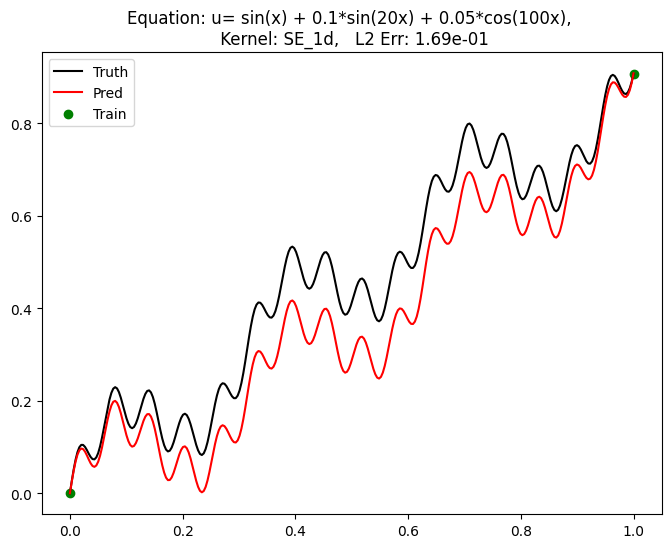

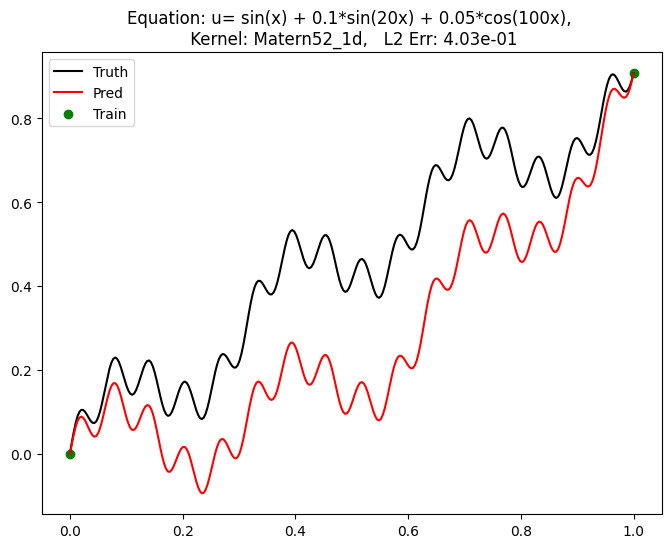

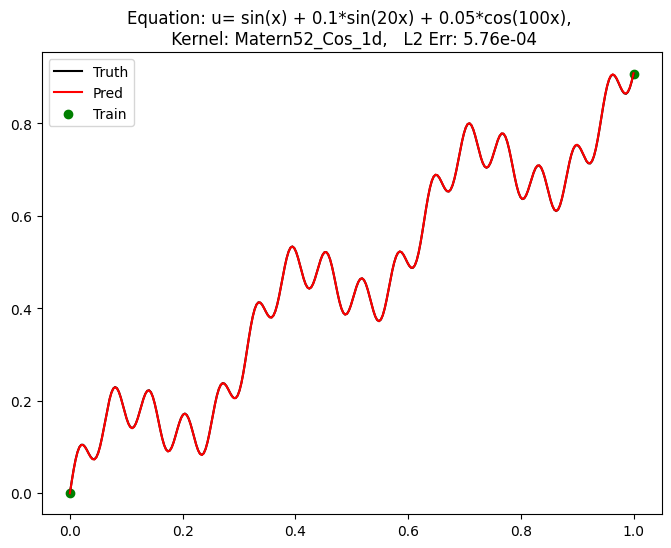

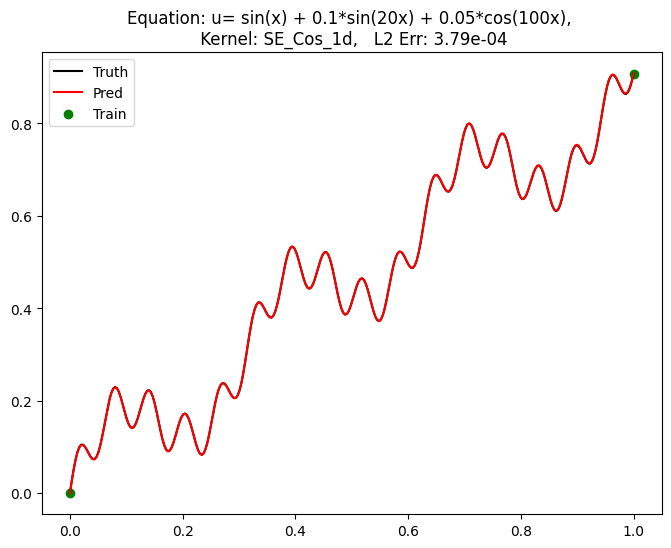

In [32]:
# for poisson_1d_mix_sin

for kernel_name in ['SE_1d','Matern52_1d']:
    prefix = '../result_log/poisson_1d-mix_sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
    save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1'

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)
    draw_fig(model, preds, Xtr, log_dict)


kernel_name = 'Matern52_Cos_1d-extra-Matern52_1d'
prefix = '../result_log/poisson_1d-mix_sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1extra_GP_change_point_0.5'
model, preds, Xtr, log_dict = load_and_predict_extra(prefix, save_name)
draw_fig(model, preds, Xtr, log_dict)


kernel_name = 'SE_Cos_1d-extra-Matern52_1d'
prefix = '../result_log/poisson_1d-mix_sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=30-logdet-1extra_GP_change_point_0.3'
model, preds, Xtr, log_dict = load_and_predict_extra(prefix, save_name)
draw_fig(model, preds, Xtr, log_dict)


equation is:  poisson_1d-x2_add_sinx
kernel is: SE_1d
equation is:  poisson_1d-x2_add_sinx
kernel is: Matern52_1d
equation is:  poisson_1d-x2_add_sinx
kernel is: Matern52_Cos_1d
using extra GP with kernel: Matern52_1d
equation is:  poisson_1d-x2_add_sinx
kernel is: SE_Cos_1d
using extra GP with kernel: Matern52_1d


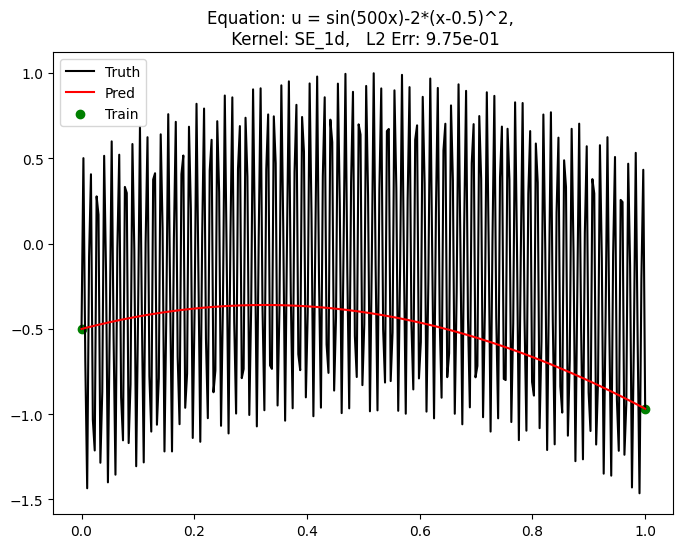

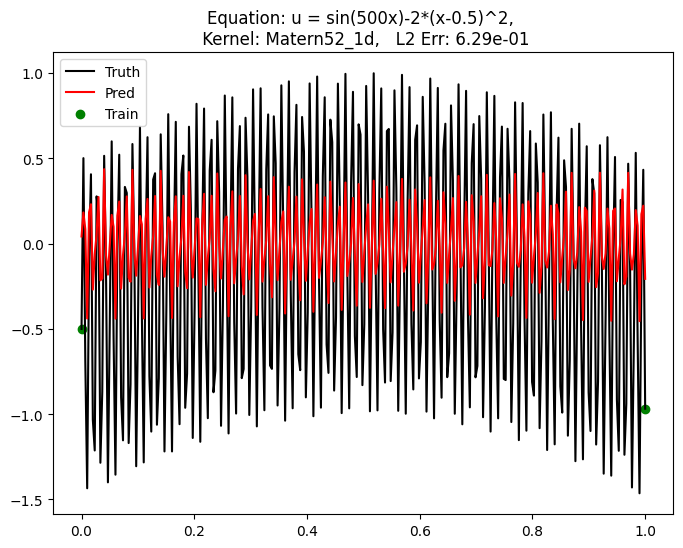

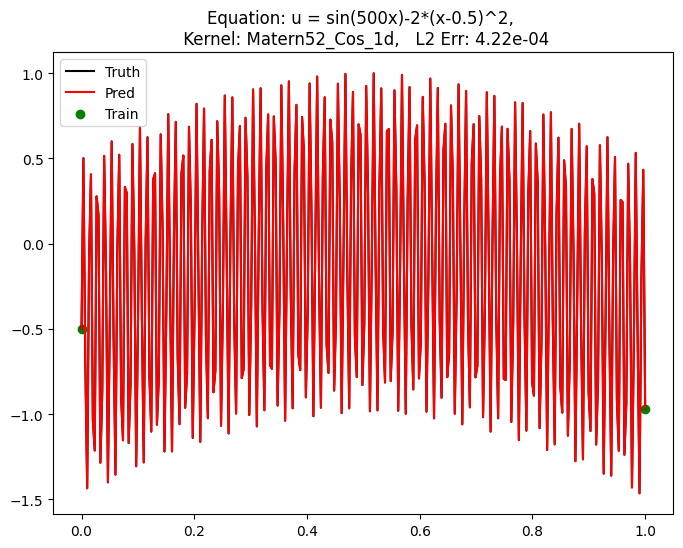

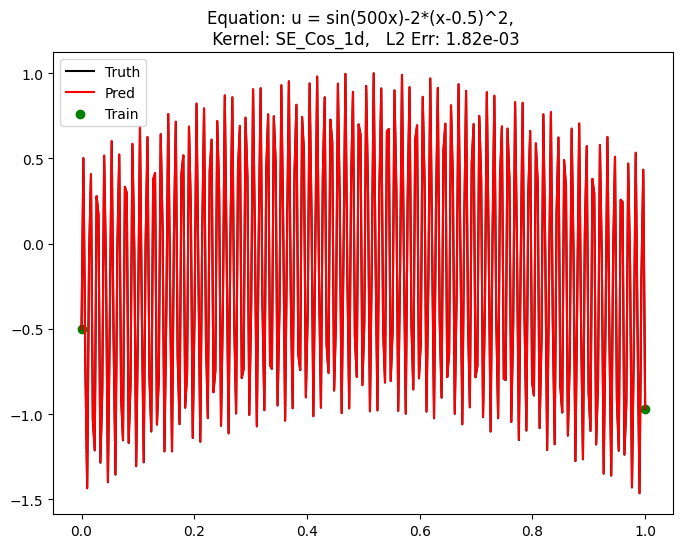

In [38]:
# for poisson_1d-x2_add_sinx

for kernel_name in ['SE_1d','Matern52_1d']:
    prefix = '../result_log/poisson_1d-x2_add_sinx/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
    save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=100-logdet-1'

    model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)
    draw_fig(model, preds, Xtr, log_dict)


kernel_name = 'Matern52_Cos_1d-extra-Matern52_1d'
prefix = '../result_log/poisson_1d-x2_add_sinx/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=100-logdet-1extra_GP_change_point_0.3'
model, preds, Xtr, log_dict = load_and_predict_extra(prefix, save_name)
draw_fig(model, preds, Xtr, log_dict)


kernel_name = 'SE_Cos_1d-extra-Matern52_1d'
prefix = '../result_log/poisson_1d-x2_add_sinx/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=100-logdet-1extra_GP_change_point_0.1'
model, preds, Xtr, log_dict = load_and_predict_extra(prefix, save_name)
draw_fig(model, preds, Xtr, log_dict)
